In [1]:
import pandas as pd
from scipy import stats 
from sklearn import linear_model

In [8]:
df = pd.read_csv("training.csv")

In [19]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.head()

,netName_x,util,cp,bboxArea,bboxAr,numPins,numVias
0,clk,60,1600,967.303,0.191,7,18
1,rst,60,1600,1.600,0.400,4,3
2,done,60,1600,0.000,0.000,2,1
3,{key[127]},60,1600,0.000,0.000,2,1
4,{key[126]},60,1600,0.000,0.000,2,1


In [15]:
len(df) * 0.8

27891.2

In [21]:
df[:2]

,netName_x,util,cp,bboxArea,bboxAr,numPins,numVias
0,clk,60,1600,967.303,0.191,7,18
1,rst,60,1600,1.600,0.400,4,3


## baseline model

In [22]:
import pandas as pd
from scipy import stats 
from sklearn import linear_model

# to save model
import pickle


df = pd.read_csv("training.csv")

train = df[: 27891]
test = df[27891:]

# build ML model using scipy LinearRegression
reg = linear_model.LinearRegression()
var_train = train[['bboxArea','bboxAr', 'numPins']]
label_train = train['numVias']
var_test = test[['bboxArea','bboxAr', 'numPins']]
label_test = test['numVias']



In [23]:
len(train)

27891

In [24]:
reg.fit(var_train, label_train)
# print("trained coeff:", reg.coef_)
# print(reg.score(var, label))

# save ML model
fileName = "linearRegression.sav"
pickle.dump(reg, open(fileName, "wb"))


In [25]:
import pandas as pd
import numpy as np
from scipy import stats 
from sklearn import linear_model

# to load model
import pickle

fileName = "linearRegression.sav"
reg = pickle.load(open(fileName, 'rb'))

df = pd.read_csv("training.csv" )

var = df[['bboxArea','bboxAr', 'numPins']]
label = df['numVias']

  # save inference CSV
with open('inference.csv', 'wb') as f:
  f.write(b"numVias\n") 
  np.savetxt(f, reg.predict(var_test), delimiter=",", fmt='%.3f')



In [26]:
import pandas as pd
import numpy as np

def rmse(predictions, targets):
  return np.sqrt(((predictions - targets) ** 2).mean())

# merge three *.csv into one pandas dataframe 
dfTrain = pd.read_csv("training.csv")
dfInf = pd.read_csv("inference.csv")

trainVar = np.asarray(list(dfTrain['numVias']))
infVar = np.asarray(list(dfInf['numVias']))

rmse = rmse(label_test, infVar)
print("RMSE: ", rmse)

RMSE:  3.059359916918521


## Random Forests

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [70]:

X = df[['bboxArea','bboxAr', 'numPins']]
y = df['numVias']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

* Feature Scaling

We know our dataset is not yet a scaled value, for instance the bboxArea field has values in the range of thousands while bboxAr has values in range of tenths. Therefore, it would be beneficial to scale our data (although, as mentioned earlier, this step isn't as important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [32]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2.449566881538972


* Add more features: util,	cp

In [71]:
X = df[['bboxArea','bboxAr', 'numPins', 'util', 'cp']]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
regressor2 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor2.fit(X_train, y_train)
y_pred = regressor2.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 3.156628089539091


In [35]:
regressor2 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor2.fit(X_train, y_train)
y_pred = regressor2.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2.414973459360567


In [48]:
regressor3 = RandomForestRegressor(n_estimators=600, random_state=0)
regressor3.fit(X_train, y_train)
y_pred = regressor3.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2.367231784599437


In [50]:
regressor2 = RandomForestRegressor(n_estimators=500, random_state=0)
regressor2.fit(X_train, y_train)
y_pred = regressor2.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2.3675529148168826


In [60]:

n_list = list(range(500,700,10))

rmse_list = []
for n in n_list:
    regressor2 = RandomForestRegressor(n_estimators= n, random_state=0)
    regressor2.fit(X_train, y_train)
    y_pred = regressor2.predict(X_test)
    rmse_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


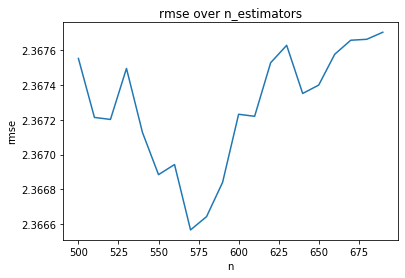

In [61]:
import matplotlib.pyplot as plt
plt.plot(n_list, rmse_list)
plt.title('rmse over n_estimators')
plt.xlabel('n')
plt.ylabel('rmse')
plt.show()

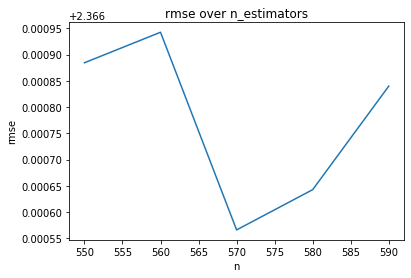

In [62]:
n_list = list(range(550,600,10))

rmse_list = []
for n in n_list:
    regressor2 = RandomForestRegressor(n_estimators= n, random_state=0)
    regressor2.fit(X_train, y_train)
    y_pred = regressor2.predict(X_test)
    rmse_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.plot(n_list, rmse_list)
plt.title('rmse over n_estimators')
plt.xlabel('n')
plt.ylabel('rmse')
plt.show()

In [72]:
regressor2 = RandomForestRegressor(n_estimators=570, random_state=0)
regressor2.fit(X_train, y_train)
y_pred = regressor2.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2.3665661773664284
